# PHYS20762 - Project 2 - Spring Mass system

Alexander Stansfield<br>
University of Manchester  
March 2022

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})
plt.style.use('default')


## Theory

A spring mass system is deterined entirely by one equation:

$$ma(t) + bv(t) + kx(t) = F(t)$$

where $x(t)$ is the position of the mass, $v(t) = \frac{dx}{dt}$, $a(t) = \frac{d^2 x}{dt^2}$, and $F(t)$ is the external force on the spring.

This equation can be written simpler as:

$$\ddot{x} + \gamma\dot{x} + {\omega_0}^2 x = F(t)$$

where $\gamma = \frac{b}{m}$ and ${\omega_0}^2 = \frac{k}{m}$.

If the driving force is equal to zero, $F(t) = 0$, the equation has 3 anayltical solution:

- Light damping (${\omega_0}^2 > \frac{\gamma^2}{4}$):
$$x(t) = Ae^{-\frac{\gamma}{2}t}cos(\omega t + \phi)$$

where $\omega = \sqrt{{\omega_0}^2 - \frac{\gamma^2}{4}}$

- Heavy damping (${\omega_0}^2 < \frac{\gamma^2}{4}$):
$$x(t) = e^{-\frac{\gamma}{2}t}\left(Ae^{\alpha t} + Be^{-\alpha t}\right)$$

where $\alpha = \sqrt{\frac{\gamma^2}{4} - {\omega_0}^2}$

- Critcal damping (${\omega_0}^2 = \frac{\gamma^2}{4}$):
$$x(t) = Ae^{\alpha t} + Be^{-\alpha t}$$

However, not always can analytical solutions be deriived for a system. If that's the case, numerical methods need to be used in order to approximate the motion of the system over time. There are multiple methods to do this, but in this project 4 shall be looked at:

- Euler method
- Improved Euler method
- Verlet method
- Euler-Cromer method

How the methods work are below.

## 1. Euler method

$$x_{i + 1} = x_i + hv_i$$
$$v_{i + 1} = v_i + ha_i$$

where h is a small time-step through the evolution of the system. For the spring-mass system, $a_i$ is found to be:

$$a_i = -\frac{k}{m}x_i - \frac{b}{m}v_i = -\gamma x_i - {\omega_0}^2v_i$$

So for in an initial $x = x_0$ and $v = v_0$, the $i^{th}$ state of the system can be approximated. This method is derived from definition of $a(t)$ and $v(t)$. For $v(t)$:

$$v(t) = \frac{dx}{dt} = \lim_{h\to 0}\frac{x(t+h) - x(t))}{h} \approx \frac{x(t+h - x(t))}{h} + error$$

Expanding $x(t+h)$ around $t$ gives:

$$x(t+h) = x(t) + h\dot{x} + \frac{1}{2}h^2\ddot{x}(\zeta)$$

where $t < \zeta < t + h$. Thus the error in the approximation is $error = \frac{1}{2}h^2\ddot{x}(\zeta)$. This is called the local truncation error. This is proortional to $h^2$, so we expect the error in the approximation to decrease as $h$, the timestep, decreases.

## 2. Improved Euler method

An easy way to improve this approximation is to have an extra term in the Taylor expansion for the derivative. If we use:

$$x(t+h) = x(t) + h\dot{x} + \frac{1}{2}h^2\ddot{x} + error$$

where the error now is proportional to $h^3$. This gives us a new set of equations:

$$x_{i + 1} = x_i + hv_i + \frac{h^2}{2}a_i$$
$$v_{i + 1} = v_i + ha_i$$
$$a_i = -\gamma x_i - {\omega_0}^2v_i$$


## 3. Verlet's method

Start by looking at a slightly difference definition of a derivative, otherwise known as a centered derivative:

$$\dot{x} = \lim_{h\to 0}\frac{x(t+h) - x(t - h))}{2h}$$

and write 2 Taylor expansions:

$$x(t+h) = x(t) + hx'(t) + \frac{1}{2}h^2x''(t) + \frac{1}{6}h^3 x'''(t)(\zeta)$$
$$x(t-h) = x(t) - hx'(t) + \frac{1}{2}h^2x''(t) - \frac{1}{6}h^3 x'''(t)(\zeta)$$

where $t-h<\zeta<t+h$

Rearranging these equations gives:

$$x'(t) = \frac{x(t+h) - x(t - h))}{2h} + \frac{1}{6}h^2x'''(t)$$
$$x''(t) = \frac{x(t+h) + x(t - h) - 2x(t))}{h^2} - \frac{1}{12}h^2x''''(t)$$

We can further rearrange these equations, setting $x'(t) = v$ and $x''(t) = a$, as well as $x(t+h) = x_{i_1}$ and so forth, we get:

$$x_{i+1} = 2x_i - x_{i-1} + h^2a_i$$
$$v_i = \frac{x_{i+1} - x_{i-1}}{2h}$$
$$a_i = -\gamma x_i - {\omega_0}^2v_i$$

Note that the error is $x_{i+1}$ is now $error \propto h^4$, therefore we expect the approximation to be much more accurate than the two methods described above. The final numerical equation is:

$$
x_{i+1} = 2\frac{2m - kh^2}{2m + bh}x_i + \frac{bh - 2m}{2m + bh}x_{i-1}
$$

Note that $x_{i+1}$ requires the knoweldge of $x_i$ and $x_{i-1}$. Therfore, we cannot use this equation for the very start of the system. Other methods, such as the Euler method, has to be used at least once before this method can be used. 

## 4. Euler-Cromer method

All methods described above, especially the Euler method, have a major flaw. As the system evolves, the energy is not conserved form one timestep to the next. In order to account for this, another type of integrator needs to be used. This is called a symplectic integrator and is derived to ensure the preservation of energy. If we make a slight change to the Euler's method:

$$x_{i + 1} = x_i + hv_{i+1}$$
$$v_{i + 1} = v_i + ha_i$$

then the expression for energy becomes:

$$
E_{i+1} = E_i -\frac{h^2}{2}\left(\frac{k^2{x_i}^2}{m} - k{v_i}^2\right) - h^3\frac{k^2x_iv_i}{m} + h^4\frac{k^3{x_i}^2}{2m^2}
$$

The terms after the $E_i$ average out over one oscillation, so energy is conserved.


## Experimental parameters

In [2]:
spring_constant = 0.6 #(kg / s^2 this is k in the equations above)
mass = 2.95 #(kg)

damping = 0 #this is b in above equations, this will be variables in future

omega_square = spring_constant / mass
gamma = damping / mass

## Approach

We shall start by havng no external force on the system, $F(t) = 0$. The code below defines all the functions for the numerical integrators using the equations found in the theory section:

In [3]:
def Euler(position, velocity, timestep):
    acceleration = - omega_square * position - gamma * velocity

    next_position = position + timestep * velocity
    next_velocity = velocity + timestep * acceleration

    return next_position, next_velocity

def improved_Euler(position, velocity, timestep):
    acceleration = - omega_square * position - gamma * velocity

    next_position = position + timestep * velocity + (timestep**2 / 2) * acceleration
    next_velocity = velocity + timestep * acceleration

    return next_position, next_velocity

def Verlet(position, previous_position, timestep):
    next_position = 2 * ((2*mass - spring_constant * timestep**2)/(2*mass + damping * timestep)) * position + ((damping * timestep - 2*mass) / (2*mass + damping * timestep)) * previous_position
    current_velocity = (next_position - previous_position)/(2*timestep)

    return next_position, current_velocity

def Euler_Cromer(position, velocity, timestep):
    acceleration = - omega_square * position - gamma * velocity

    next_position = position + timestep * (velocity + timestep * omega_square)
    next_velocity = velocity + timestep * acceleration

    return next_position, next_velocity

The analytical function depends on the relationship between the damping factor and the natural frequency. We set the initial position as x_0 = 0 and the initial velocity as v_0 = 1.

For heavy and critical damping, the constants A and B are found to be: A = $\frac{1}{2\alpha}$ and B = $\frac{-1}{2\alpha}$.

For light damping, the constant A is found to be: A = $-\frac{1}{\omega}$

In [4]:
def analytical(time_data):

    diff = gamma**2 / 4 - omega_square

    if diff > 0: #heavy damping
        alpha = math.sqrt(diff)
        A = 1 / (2*alpha)
        B = - 1 / (2*alpha)
        position = np.power(math.e, (-gamma / 2 * time_data)) * (A * np.power(math.e, (alpha * time_data)) + B * np.power(math.e, (-alpha * time_data)))
        velocity = alpha*np.power(math.e, (-gamma / 2 * time_data))*(A*np.power(math.e,(alpha*time_data))-B*np.power(math.e, (-alpha * time_data)))-gamma/2*np.power(math.e, (-gamma / 2 * time_data)) * (A * np.power(math.e, (alpha * time_data)) + B * np.power(math.e, (-alpha * time_data)))
        return position, velocity

    if diff == 0: #critical damping
        alpha = math.sqrt(diff)
        A = 1 / (2*alpha)
        B = - 1 / (2*alpha)
        position = A * np.power(math.e, (alpha * time_data)) + B * np.power(math.e, (-alpha * time_data))
        velocity = alpha*(A*np.power(math.e,(alpha*time_data))-B*np.power(math.e, (-alpha * time_data)))
        return position, velocity
    
    if diff < 0: #light damping
        omega = math.sqrt(omega_square - gamma**2 / 4)
        A = - 1 / omega
        position = A * np.power(math.e, (-gamma / 2 * time_data)) * np.cos(omega*time_data + math.pi / 2)
        velocity = -gamma/2*A*np.power(math.e,(-gamma/2*time_data))*np.cos(omega*time_data+math.pi/2) - omega*A*np.power(math.e,(-gamma/2*time_data))*np.sin(omega*time_data+math.pi/2)
        return position, velocity

Now we plot the outputs of the analytical function, the true behaviour of the system, and compare that to the outputs of the numerical methods. Below is a plot of the true behaviour of the system with the damping factor, b, set to 0.

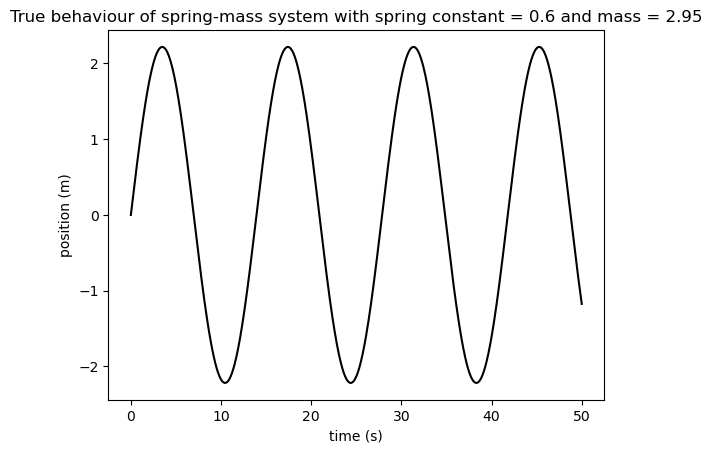

In [5]:
time_end = 50
time_data = np.linspace(0, time_end, num=1001, endpoint = True)

plt.xlabel("time (s)")
plt.ylabel("position (m)")
plt.title("True behaviour of spring-mass system with spring constant = {0} and mass = {1}".format(spring_constant, mass))

def plot_analytical():
    position_data, velocity_data = analytical(time_data)
    plt.plot(time_data, position_data, 'k')
    plt.show()

plot_analytical()

We shall now compare this to the numerical methods.

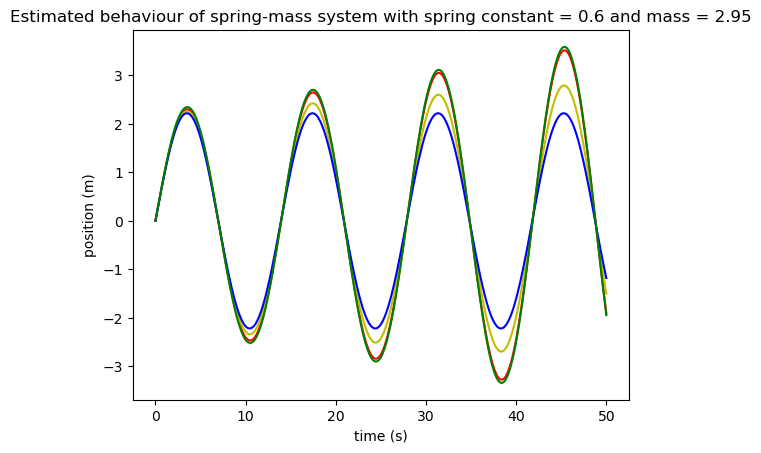

In [6]:
plt.xlabel("time (s)")
plt.ylabel("position (m)")
plt.title("Estimated behaviour of spring-mass system with spring constant = {0} and mass = {1}".format(spring_constant, mass))

initial_position = 0 #in meters
initial_velocity = 1 #in ms^-1
timestep = 0.1 #time between each estimation
decimal_places = 5
time_end_corrected = np.around(math.floor(time_end / timestep) * timestep, decimals = decimal_places)

approx_time_data = np.around(np.linspace(0, time_end_corrected, num = math.floor(time_end / timestep) + 1, endpoint = True), decimals = decimal_places)

def Euler_approximation():
    time = 0
    current_position = initial_position
    current_velocity = initial_velocity
    Euler_position_data = [initial_position]
    Euler_velocity_data = [initial_velocity]
    while time < time_end_corrected:
        time = round((timestep + time), decimal_places) #this is done because there are rounding errors otherwise when using smaller timsteps
        current_position, current_velocity = Euler(current_position, current_velocity, timestep)
        Euler_position_data.append(current_position)   
        Euler_velocity_data.append(current_velocity)
    return np.array(Euler_position_data), np.array(Euler_velocity_data)

def improved_Euler_approximation():
    time = 0
    current_position = initial_position
    current_velocity = initial_velocity
    improved_Euler_position_data = [initial_position]
    improved_Euler_velocity_data = [initial_velocity]
    while time < time_end_corrected:
        time = round((timestep + time), decimal_places) #this is done because there are rounding errors otherwise when using smaller timsteps
        current_position, current_velocity = improved_Euler(current_position, current_velocity, timestep)
        improved_Euler_position_data.append(current_position)        
        improved_Euler_velocity_data.append(current_velocity)
    return np.array(improved_Euler_position_data), np.array(improved_Euler_velocity_data)

def Verlet_approximation():
    time = 0
    previous_position = initial_position
    previous_velocity = initial_velocity
    current_position, current_velocity = improved_Euler(previous_position, previous_velocity, timestep)
    Verlet_position_data = [initial_position]
    Verlet_velocity_data = [initial_velocity]
    while time < time_end_corrected:
        time = round((timestep + time), decimal_places) #this is done because there are rounding errors otherwise when using smaller timsteps
        next_position, current_velocity = Verlet(current_position, previous_position, timestep)
        Verlet_position_data.append(current_position)
        Verlet_velocity_data.append(current_velocity)
        previous_position = current_position
        current_position = next_position
    return np.array(Verlet_position_data), np.array(Verlet_velocity_data)

def Euler_Cromer_approximation():
    time = 0
    current_position = initial_position
    current_velocity = initial_velocity
    Euler_Cromer_position_data = [initial_position]
    Euler_Cromer_velocity_data = [initial_velocity]
    while time < time_end_corrected:
        time = round((timestep + time), decimal_places) #this is done because there are rounding errors otherwise when using smaller timsteps
        current_position, current_velocity = Euler_Cromer(current_position, current_velocity, timestep)  
        Euler_Cromer_position_data.append(current_position)
        Euler_Cromer_velocity_data.append(current_velocity)      
    return np.array(Euler_Cromer_position_data), np.array(Euler_Cromer_velocity_data)

def plot_approximation():
    plt.plot(approx_time_data, Euler_approximation()[0], 'r')
    plt.plot(approx_time_data, improved_Euler_approximation()[0], 'y')
    plt.plot(approx_time_data, Verlet_approximation()[0], 'b')
    plt.plot(approx_time_data, Euler_Cromer_approximation()[0], 'g')

plot_approximation()

where:
- red = Euler
- yellow = Improved Euler
- blue = Verlet
- green = Euler-Cromerg

The Verlet and Euler-Cromer approximations are very close. Below is a plot to make that fact clear, with red points showing what the true position of the system is.

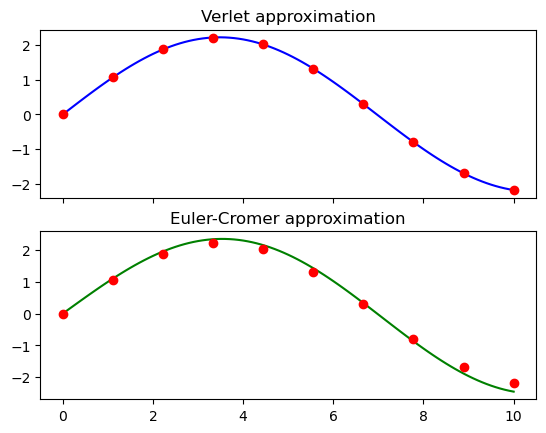

In [8]:
time_end = 10
time_end_corrected = np.around(math.floor(time_end / timestep) * timestep, decimals = decimal_places)
approx_time_data = np.around(np.linspace(0, time_end_corrected, num = math.floor(time_end / timestep) + 1, endpoint = True), decimals = decimal_places)
time_data = np.linspace(0, time_end, num = 10, endpoint = True)

fig, axes = plt.subplots(2, sharex = True)
axes[0].plot(approx_time_data, Verlet_approximation()[0], 'b')
axes[0].plot(time_data, analytical(time_data)[0], 'ro')
axes[1].plot(approx_time_data, Euler_Cromer_approximation()[0], 'g')
axes[1].plot(time_data, analytical(time_data)[0], 'ro')
axes[1].set_title('Euler-Cromer approximation')

plt.show()

When the damping factor, b, is equal to zero, we expect the energy of the system to remain constant indefinitely. This is evident from the analytical plot, the amplitude of oscillation remains constant over time. However, for the Euler method and improved Euler method, the amplitude of oscillation actually increases over time. This can only happen if there is energy being put into the system, which is not the case. As we know the energy of the oscillator to be:

$$E = \frac{1}{2}kx^2 + \frac{1}{2}mv^2$$
$$\rightarrow E_{i+1} = \frac{1}{2}kx_{i+1}^2 + \frac{1}{2}mv_{i+1}^2$$

we can see what the Euler method predicts the energy of the next time step to be. Putting in the equations for $x_i$ and $v_i$, we get:

$$E_{i+1} = \frac{1}{2}k(x_i + hv_i)^2 + \frac{1}{2}m\left[v_i\left(1-\frac{hb}{m}\right) - x_i\frac{hk}{m}\right]^2$$
$$\rightarrow E_{i + 1} = E_i\left(1 + \frac{k}{m}h^2\right)$$

when $b=0$, thus $E_{i + 1} > E_i$. Therefore the Euler method predicts that the energy always increases! The energy of the next timestep approximated by the improved Euler method is slightly less trivial to solve. The equation is given by:

$$E_{i + 1} = \frac{1}{2}k\left[x_i\left(1-\frac{h^2k}{2m}\right) + hv_i\left(1-\frac{hb}{2m}\right)\right]^2 + \frac{1}{2}m\left[v_i\left(1-\frac{hb}{m}\right) - x_i\frac{hk}{m}\right]^2$$

Since it is clearly still very similar to Euler's method, it also does not conserve energy. However, this does not appear to be the case with the Verlet method or the Euler-Cromer method. Again, taking a look at the estimate for the energy of the next time step, the Euler-Cromer method predicts the energy of the next time step to be:

$$E_{i + 1} = E_i - \left[\frac{1}{2}h^2\left(\frac{k^2x_{i}^2}{m} - kv_{i}^2\right) - h^3\frac{k^2x_iv_i}{m} + h^4\frac{k^3x_{i}^2}{2m^2}\right]$$

The part in the square brackets averages out to zero over one oscillation, as can be seen in the plots below. Therefore energy is conserved over one oscillation. Since the equtions for the Verlet method cannot be solved seperately, a plot of the energy will be made by inputting the Verlet equations into the energy equation for an oscillator. The equation is:

$$E_{i+1} = \frac{1}{2}k(2x_i - x_{i-1} + h^2a_i)^2 + \frac{1}{2}m\left(\frac{x_{i+2} - x_{i}}{2h}\right)^2$$

The position $x_{i+2}$ can be found with:

$$x_{i+2} = 2\frac{2m - kh^2}{2m + bh}x_{i+1} + \frac{bh - 2m}{2m + bh}x_{i}$$

and again $x_{i+1}$ can be found using the same equation. Thus we have reduced the energy equation into requiring the knowledge of the previous position and the current position. However, once again a different method will need to be used to calculate one timestep into the system's evolution since 2 positions are required. The Euler method is used to do so.

Bellow are the function to plot the energy as predicted by the approximate methods.

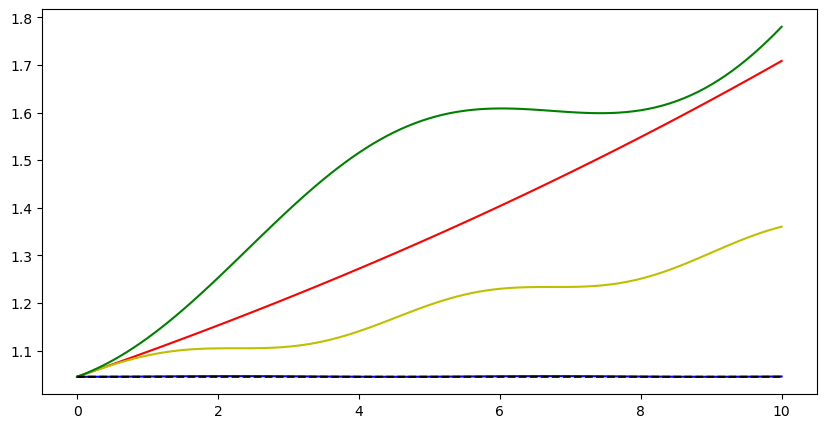

In [9]:
plt.rcParams["figure.figsize"] = (10, 5)

spring_constant = 1.03 #(kg / s^2 this is k in the equations above)
mass = 2.09 #(kg)
damping = 0 #this is b in above equations, this will be variables in future
omega_square = spring_constant / mass
gamma = damping / mass

time_end = 10
timestep = 0.1
time_end_corrected = np.around(math.floor(time_end / timestep) * timestep, decimals = decimal_places)
approx_time_data = np.around(np.linspace(0, time_end_corrected, num = math.floor(time_end / timestep) + 1, endpoint = True), decimals = decimal_places)
time_data = np.linspace(0, time_end, num=10000, endpoint = True)

def Euler_Energy():
    Energy = 0.5*spring_constant*Euler_approximation()[0]**2 + 0.5*mass*Euler_approximation()[1]**2
    return Energy

def improved_Euler_Energy():
    Energy = 0.5*spring_constant*improved_Euler_approximation()[0]**2 + 0.5*mass*improved_Euler_approximation()[1]**2
    return Energy

def Euler_Cromer_Energy():
    Energy = 0.5*spring_constant*Euler_Cromer_approximation()[0]**2 + 0.5*mass*Euler_Cromer_approximation()[1]**2
    return Energy

def Verlet_Energy():
    Energy = 0.5*spring_constant*Verlet_approximation()[0]**2 + 0.5*mass*Verlet_approximation()[1]**2
    return Energy

def analytical_energy():
    position, velocity = analytical(time_data)
    Energy = 0.5*spring_constant*position**2 + 0.5*mass*velocity**2
    return Energy

plt.plot(approx_time_data, Euler_Energy(), 'r')
plt.plot(approx_time_data, improved_Euler_Energy(), 'y')
plt.plot(approx_time_data, Verlet_Energy(), 'b')
plt.plot(approx_time_data, Euler_Cromer_Energy(), 'g')
plt.plot(time_data, analytical_energy(), "k--")

plt.show()

It is clear to see that the Euler and the improved Euler method do not conserve energy over time, and as such are not great methods to use when the damping factor is equal to zero. However, both the Velert method and the Euler-Cromer method oscillate about a fixed energy, and as such provide a good approximation of the position of the system even after great length of time. These methods where energy is preserved are called symplectic integrators.

It appears to be that the Verlet method provides a closer approximation to that provided by the Euler-Cromer method, since the associated energy is closer to the expected value compared to that from the Euler-Cromer method. Below is a plot displaying just the energies from the Verlet and Euler-Cromer methods.

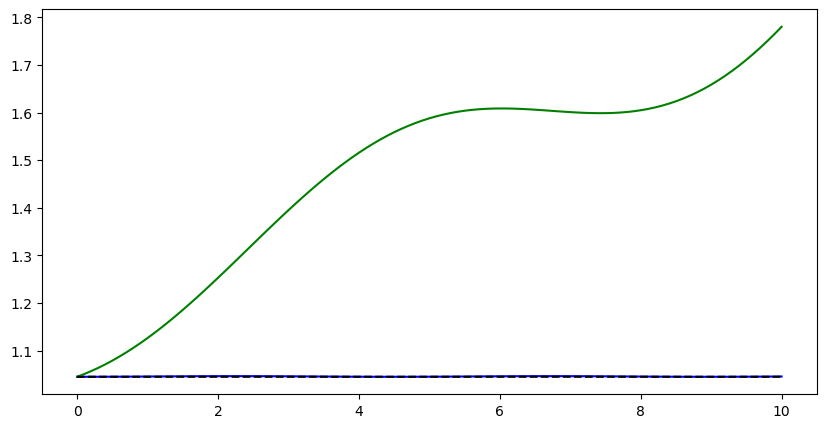

In [10]:
plt.plot(approx_time_data, Verlet_Energy(), 'b')
plt.plot(approx_time_data, Euler_Cromer_Energy(), 'g')
plt.plot(time_data, analytical_energy(), "k--")
plt.show()

Now lets change the damping factor and see how this changes the results. We shall make plots for:

- Heavy damping, b = $2b_{cr}$ = $4\sqrt{km}$
- Critical damping, b = $b_{cr}$ = $2\sqrt{km}$
- Lighter damping, b = $\frac{b_{cr}}{2}$ = $\sqrt{km}$

Below is for heavy damping.

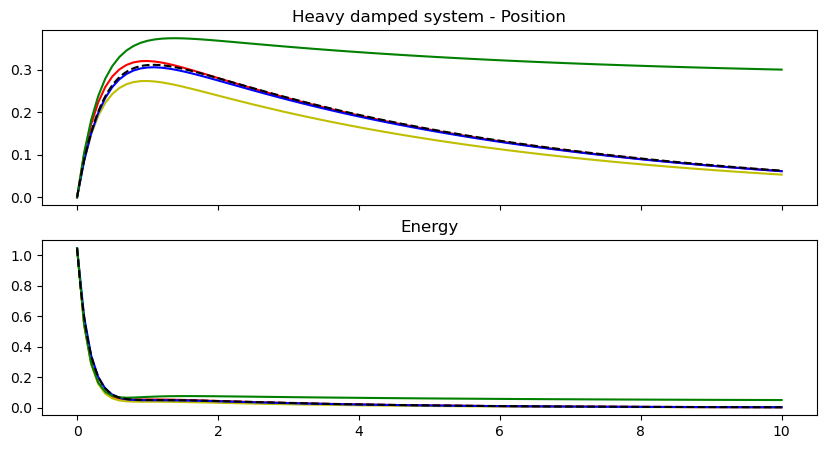

In [11]:
time_end = 10
timestep = 0.1
time_end_corrected = np.around(math.floor(time_end / timestep) * timestep, decimals = decimal_places)
approx_time_data = np.around(np.linspace(0, time_end_corrected, num = math.floor(time_end / timestep) + 1, endpoint = True), decimals = decimal_places)
time_data = np.linspace(0, time_end, num=10000, endpoint = True)

damping = 4 * math.sqrt(spring_constant * mass)
omega_square = spring_constant / mass
gamma = damping / mass

plt.rcParams["figure.figsize"] = (10, 5)

fig, axes = plt.subplots(2, sharex = True)
axes[0].plot(approx_time_data, Euler_approximation()[0], 'r')
axes[0].plot(approx_time_data, improved_Euler_approximation()[0], 'y')
axes[0].plot(approx_time_data, Verlet_approximation()[0], 'b')
axes[0].plot(approx_time_data, Euler_Cromer_approximation()[0], 'g')
axes[0].plot(time_data, analytical(time_data)[0], 'k--')
axes[0].set_title('Heavy damped system - Position')

axes[1].plot(approx_time_data, Euler_Energy(), 'r')
axes[1].plot(approx_time_data, improved_Euler_Energy(), 'y')
axes[1].plot(approx_time_data, Verlet_Energy(), 'b')
axes[1].plot(approx_time_data, Euler_Cromer_Energy(), 'g')
axes[1].plot(time_data, analytical_energy(), 'k--')
axes[1].set_title('Energy')

plt.show()

For critical dampining.

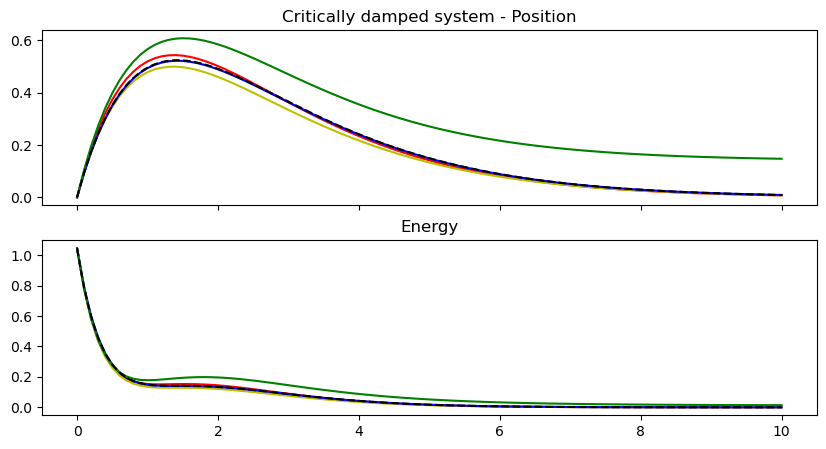

In [12]:
damping = 2 * math.sqrt(spring_constant * mass)
omega_square = spring_constant / mass
gamma = damping / mass

plt.rcParams["figure.figsize"] = (10, 5)

fig, axes = plt.subplots(2, sharex = True)
axes[0].plot(approx_time_data, Euler_approximation()[0], 'r')
axes[0].plot(approx_time_data, improved_Euler_approximation()[0], 'y')
axes[0].plot(approx_time_data, Verlet_approximation()[0], 'b')
axes[0].plot(approx_time_data, Euler_Cromer_approximation()[0], 'g')
axes[0].plot(time_data, analytical(time_data)[0], 'k--')
axes[0].set_title('Critically damped system - Position')

axes[1].plot(approx_time_data, Euler_Energy(), 'r')
axes[1].plot(approx_time_data, improved_Euler_Energy(), 'y')
axes[1].plot(approx_time_data, Verlet_Energy(), 'b')
axes[1].plot(approx_time_data, Euler_Cromer_Energy(), 'g')
axes[1].plot(time_data, analytical_energy(), 'k--')
axes[1].set_title('Energy')

plt.show()

And underdamped.

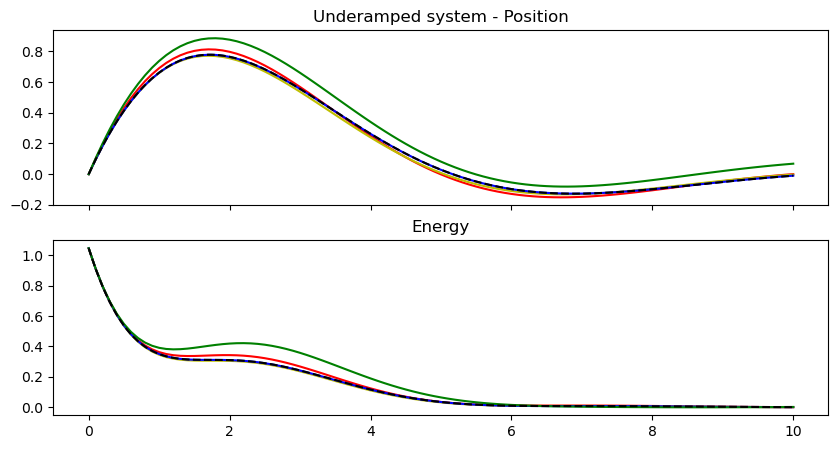

In [13]:
damping = math.sqrt(spring_constant * mass)
omega_square = spring_constant / mass
gamma = damping / mass

plt.rcParams["figure.figsize"] = (10, 5)

fig, axes = plt.subplots(2, sharex = True)
axes[0].plot(approx_time_data, Euler_approximation()[0], 'r')
axes[0].plot(approx_time_data, improved_Euler_approximation()[0], 'y')
axes[0].plot(approx_time_data, Verlet_approximation()[0], 'b')
axes[0].plot(approx_time_data, Euler_Cromer_approximation()[0], 'g')
axes[0].plot(time_data, analytical(time_data)[0], 'k--')
axes[0].set_title('Underamped system - Position')

axes[1].plot(approx_time_data, Euler_Energy(), 'r')
axes[1].plot(approx_time_data, improved_Euler_Energy(), 'y')
axes[1].plot(approx_time_data, Verlet_Energy(), 'b')
axes[1].plot(approx_time_data, Euler_Cromer_Energy(), 'g')
axes[1].plot(time_data, analytical_energy(), 'k--')
axes[1].set_title('Energy')

plt.show()